In [120]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def get_gaussian_value(min_num, max_num, media, std_dev):
    while True:
        val = random.gauss(media, std_dev)
        if val>=min_num and val<=max_num:
            return val

In [121]:
def data_generator():
    rows = []
    for i in range(10000):
        row_dict = {}
        
        row_dict['embalaje'] = random.choice(['A', 'B', 'C'])
        row_dict['largo'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['ancho'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['alto'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['peso'] = get_gaussian_value(1, 50, 25, 5)
        row_dict['procedencia'] = random.choice(['A', 'B', 'C', 'D'])
        
        # 20% es refrigerado
        if random.random() <= 0.2:
            row_dict['temperatura'] = 'refrigerado'
        else:
            row_dict['temperatura'] = 'ambiente'
            
        # 20% es fragil independientemente de la temperatura
        if random.random() <= 0.2:
            row_dict['manipulacion'] = 'fragil'
        else:
            # si la temperatura es refrigerado entonces la manipulacion es fragil
            if row_dict['temperatura'] == 'refrigerado':
                row_dict['manipulacion'] = 'fragil'
            else:
                row_dict['manipulacion'] = 'normal'
            
        
        
        # etiquetado del protocolo
        volumen = row_dict['largo'] * row_dict['ancho'] * row_dict['alto']
        if volumen <= 3375 or row_dict['manipulacion'] == 'fragil':
            row_dict['protocolo'] = 'protocolo_1'
        else:
            row_dict['protocolo'] = 'protocolo_2'

        
        
        rows.append(row_dict)
        
    return rows

data_dict = data_generator()

In [122]:
df = pd.DataFrame.from_records(data_dict)
df

,embalaje,largo,ancho,alto,peso,procedencia,temperatura,manipulacion,protocolo
0,A,53.693709,64.333860,61.185574,24.323075,C,ambiente,normal,protocolo_2
1,B,47.739875,64.184591,22.322401,16.795167,D,refrigerado,fragil,protocolo_1
2,B,41.573055,64.073399,68.503022,30.595503,B,ambiente,fragil,protocolo_1
3,A,52.780474,51.167931,50.231358,19.520050,C,ambiente,normal,protocolo_2
4,B,74.374250,39.805869,78.952805,26.613655,B,refrigerado,fragil,protocolo_1
...,...,...,...,...,...,...,...,...,...
9995,A,73.750326,46.682754,79.935481,26.466229,C,ambiente,normal,protocolo_2
9996,A,21.363476,60.723403,56.569219,24.544133,D,ambiente,normal,protocolo_2
9997,A,54.180777,64.810235,19.130036,26.040492,B,ambiente,fragil,protocolo_1
9998,C,48.325971,50.448005,51.601255,20.829663,A,ambiente,normal,protocolo_2


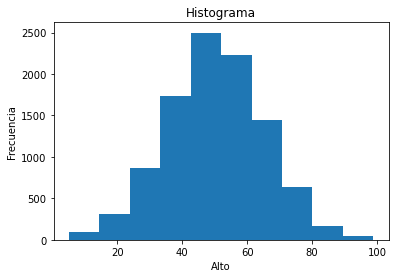

In [123]:
arr = np.array(df['alto'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Alto')
plt.title('Histograma')
plt.show()


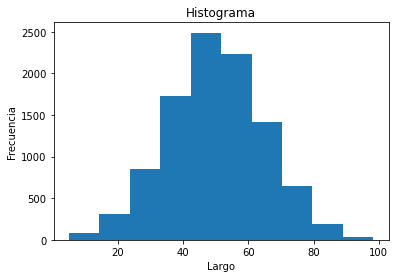

In [124]:
arr = np.array(df['largo'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Largo')
plt.title('Histograma')
plt.show()

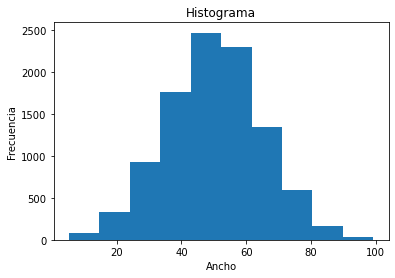

In [125]:
arr = np.array(df['ancho'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Ancho')
plt.title('Histograma')
plt.show()

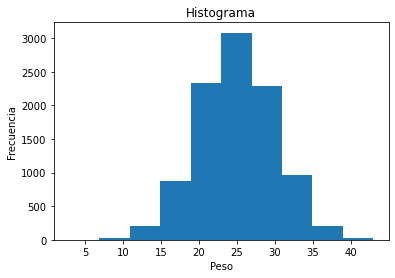

In [126]:
arr = np.array(df['peso'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Peso')
plt.title('Histograma')
plt.show()

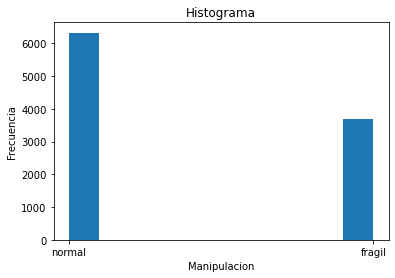

In [127]:
arr = np.array(df['manipulacion'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Manipulacion')
plt.title('Histograma')
plt.show()

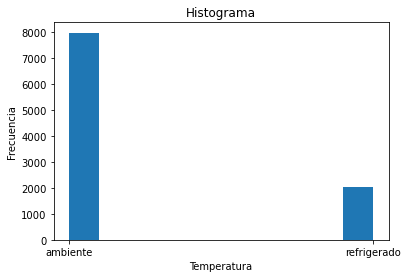

In [128]:
arr = np.array(df['temperatura'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Temperatura')
plt.title('Histograma')
plt.show()

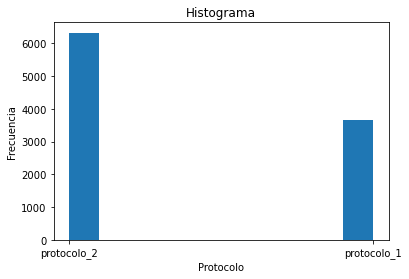

In [129]:
arr = np.array(df['protocolo'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Protocolo')
plt.title('Histograma')
plt.show()